## Deep Learning Challenge

### Loading the CIFAR10 data
The data can be loaded directly from keras (`keras.datasets.cifar10`).

```python
cifar10 = keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
```

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()


In [2]:
train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

In [25]:
train_labels.shape

(50000, 10)

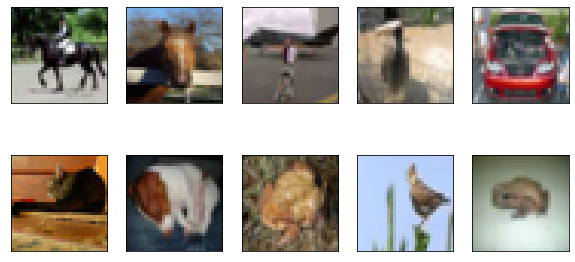

In [9]:
import numpy as np
from matplotlib import pyplot as plt
def show_random_examples(x, y, p):
    indices = np.random.choice(range(x.shape[0]), 10, replace=False)
    
    x = x[indices]
    y = y[indices]
    p = p[indices]
    
    plt.figure(figsize=(10, 5))
    for i in range(10):
        plt.subplot(2, 5, i + 1)
        plt.imshow(x[i])
        plt.xticks([])
        plt.yticks([])
        # col = 'green' if np.argmax(y[i]) == np.argmax(p[i]) else 'red'
        # plt.xlabel(class_names[np.argmax(p[i])], color=col)
    plt.show()

show_random_examples(train_images, train_labels, train_labels)

#### Task: Build a convulution neural network (CNN) to predict the object in the images. 

Try to do it on your own first before consulting with peers or tutorials on the internet. If you are stuck early, reach out to a mentor who will point you in the right direction.

In [11]:
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

In [32]:
inputs = tf.keras.layers.Input(shape=(32,32,3), name = 'input_layer')
x = base_model(inputs)
x = tf.keras.layers.GlobalAveragePooling2D(name='global_average_pooling_layer')(x)
outputs = tf.keras.layers.Dense(10, activation='softmax', name = 'output_layer')(x)
model_0 = tf.keras.Model(inputs, outputs)
model_0.compile(loss='categorical_crossentropy',
    optimizer = tf.keras.optimizers.Adam(),
    metrics=['accuracy'])

h = model_0.fit(
    train_images, train_labels,
    validation_data=(test_images, test_labels),
    epochs=20, batch_size=256,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2),
        tf.keras.callbacks.ModelCheckpoint('models/model_{val_accuracy:.3f}.h5', save_best_only=True,
                                          save_weights_only=False, monitor='val_accuracy')
    ]
)

Epoch 1/20
196/196 [==============================] - 19s 41ms/step - loss: 1.7729 - accuracy: 0.3878 - val_loss: 1.5396 - val_accuracy: 0.4682
C:\Users\jesse\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '
Epoch 2/20
196/196 [==============================] - 6s 32ms/step - loss: 1.4966 - accuracy: 0.4789 - val_loss: 1.4303 - val_accuracy: 0.4998
Epoch 3/20
196/196 [==============================] - 6s 32ms/step - loss: 1.4110 - accuracy: 0.5123 - val_loss: 1.3652 - val_accuracy: 0.5265
Epoch 4/20
196/196 [==============================] - 6s 32ms/step - loss: 1.3654 - accuracy: 0.5265 - val_loss: 1.3285 - val_accuracy: 0.5353
Epoch 5/20
196/196 [==============================] - 6s 32ms/step - loss

In [17]:
model_0.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 32, 32, 3)]       0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, None, None, 1280)  4049571   
_________________________________________________________________
global_average_pooling_layer (None, 1280)              0         
_________________________________________________________________
output_layer (Dense)         (None, 10)                12810     
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


In [44]:
#base_model.layers

In [33]:
base_model_1 = tf.keras.applications.EfficientNetB7(include_top=False)
base_model_1.trainable = False

258080768/258076736 [==============================] - 33s 0us/step


In [18]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import Dropout, Flatten, Input, Dense, InputLayer

def create_model():
    
    def add_conv_block(model, num_filters):
        
        # model.add(Conv2D(num_filters, 3, activation='relu', padding='same'))
        # model.add(BatchNormalization())
        model.add(Conv2D(num_filters, 3, activation='relu', padding='same'))
        model.add(BatchNormalization())
        model.add(Conv2D(num_filters, 3, activation='relu', padding='valid'))
        model.add(MaxPooling2D(pool_size=2))
        model.add(Dropout(0.2))

        return model
    
    model = tf.keras.models.Sequential()
    model.add(Input(shape=(32, 32, 3)))
    
    #model = add_conv_block(model, 32)
    model = add_conv_block(model, 32)
    model = add_conv_block(model, 64)
    model = add_conv_block(model, 128)


    model.add(Flatten())
    model.add(Dense(10, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model_1 = create_model()
model_1.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_67 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_35 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_68 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_27 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_69 (Conv2D)           (None, 15, 15, 64)        18496     
_________________________________________________________________
batch_normalization_36 (Batc (None, 15, 15, 64)      

In [14]:
h_1 = model_1.fit(
    train_images/255., train_labels,
    validation_data=(test_images/255., test_labels),
    epochs=50, batch_size=256,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2),
        tf.keras.callbacks.ModelCheckpoint('models_1/model_{val_accuracy:.3f}.h5', save_best_only=True,
                                          save_weights_only=False, monitor='val_accuracy')
    ]
)

Epoch 1/50
196/196 [==============================] - 4s 16ms/step - loss: 1.5316 - accuracy: 0.4583 - val_loss: 3.1974 - val_accuracy: 0.1130
Epoch 2/50
196/196 [==============================] - 3s 15ms/step - loss: 1.0743 - accuracy: 0.6177 - val_loss: 2.3411 - val_accuracy: 0.2267
Epoch 3/50
196/196 [==============================] - 3s 15ms/step - loss: 0.8911 - accuracy: 0.6852 - val_loss: 1.1650 - val_accuracy: 0.6127
Epoch 4/50
196/196 [==============================] - 3s 15ms/step - loss: 0.7789 - accuracy: 0.7271 - val_loss: 0.9157 - val_accuracy: 0.6969
Epoch 5/50
196/196 [==============================] - 3s 14ms/step - loss: 0.7004 - accuracy: 0.7537 - val_loss: 0.7532 - val_accuracy: 0.7457
Epoch 6/50
196/196 [==============================] - 3s 14ms/step - loss: 0.6438 - accuracy: 0.7742 - val_loss: 0.8288 - val_accuracy: 0.7221
Epoch 7/50
196/196 [==============================] - 3s 14ms/step - loss: 0.5955 - accuracy: 0.7892 - val_loss: 0.6581 - val_accuracy: 0.7734

In [45]:
h_2 = model_0.fit(
    train_images, train_labels,
    validation_data=(test_images, test_labels),
    epochs=20, batch_size=32,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2),
        tf.keras.callbacks.ModelCheckpoint('models_1_2/model_{val_accuracy:.3f}.h5', save_best_only=True,
                                          save_weights_only=False, monitor='val_accuracy')
    ]
)

Epoch 1/20
1563/1563 [==============================] - 37s 24ms/step - loss: 1.2102 - accuracy: 0.5728 - val_loss: 1.2173 - val_accuracy: 0.5716
C:\Users\jesse\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '
Epoch 2/20
1563/1563 [==============================] - 38s 24ms/step - loss: 1.1880 - accuracy: 0.5829 - val_loss: 1.1805 - val_accuracy: 0.5832
Epoch 3/20
1563/1563 [==============================] - 37s 24ms/step - loss: 1.1805 - accuracy: 0.5851 - val_loss: 1.1732 - val_accuracy: 0.5910
Epoch 4/20
1563/1563 [==============================] - 37s 24ms/step - loss: 1.1718 - accuracy: 0.5871 - val_loss: 1.1916 - val_accuracy: 0.5806
Epoch 5/20
1563/1563 [==============================] - ETA: 0

KeyboardInterrupt: 